In [ ]:
pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 1.9 MB/s 
     |████████████████████████████████| 51 kB 92 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=e6076de75c0cadcb050536f2ebec33b3d9e9bd05d5162642ef4521ef861c41f8
  Stored in directory: /root/.cache/pip/wheels/ea/f9/a1/34e2943cce3cf7daca304bfc35e91280694ced9194a487ce2f
Successfully built ws4py


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pathlib
import os
data_dir_Train = pathlib.Path('/content/drive/MyDrive/datasett/traindata')
print(data_dir_Train)

data_dir_Test = pathlib.Path('/content/drive/MyDrive/datasett/testdata')
print(data_dir_Test)

/content/drive/MyDrive/datasett/traindata
/content/drive/MyDrive/datasett/testdata


In [ ]:
image_count = len(list(data_dir_Test.glob('*/*')))
print(image_count)

image_countt = len(list(data_dir_Train.glob('*/*')))
print(image_countt)

3734
7454


In [ ]:
import tensorflow as tf
import keras

batch_size = 50
img_height = 128
img_width = 128

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_Train,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_Test,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)


Found 7454 files belonging to 3 classes.
Using 5964 files for training.
Found 3734 files belonging to 3 classes.
Using 746 files for validation.
['Benigne', 'Cancer', 'Normal']


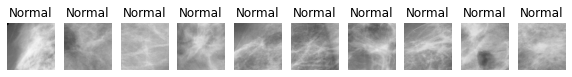

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras import layers

num_classes = 3

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

In [ ]:

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

In [ ]:

model.fit( 
    train_data,
  validation_data=val_data,
  epochs=20,
  callbacks=[tensorboard_callback]
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


120/120 [==============================] - 916s 8s/step - loss: 0.6411 - accuracy: 0.8196 - val_loss: 0.5849 - val_accuracy: 0.8405
Epoch 2/20
120/120 [==============================] - 782s 7s/step - loss: 0.6104 - accuracy: 0.8196 - val_loss: 0.5862 - val_accuracy: 0.8405
Epoch 3/20
120/120 [==============================] - 776s 6s/step - loss: 0.5607 - accuracy: 0.8209 - val_loss: 0.5231 - val_accuracy: 0.8445
Epoch 4/20
120/120 [==============================] - 782s 7s/step - loss: 0.4947 - accuracy: 0.8350 - val_loss: 0.5652 - val_accuracy: 0.8365
Epoch 5/20
120/120 [==============================] - 783s 7s/step - loss: 0.4759 - accuracy: 0.8395 - val_loss: 0.5309 - val_accuracy: 0.8391
Epoch 6/20
120/120 [==============================] - 804s 7s/step - loss: 0.4632 - accuracy: 0.8397 - val_loss: 0.5338 - val_accuracy: 0.8311
Epoch 7/20
120/120 [==============================] - 779s 6s/step - loss: 0.4526 - accuracy: 0.8462 - val_loss: 0.5279 - val_accuracy: 0.8391
Epoch 8/20

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


120/120 [==============================] - 530s 4s/step - loss: 1.1522 - accuracy: 0.0983
1.1535009145736694
0.08981233090162277
precision 0.625
reqI benigne1.png


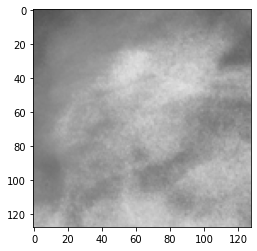

1/1 [==============================] - 0s 204ms/step
[1]
[[0.33681706 0.35361505 0.30956793]]
Cancer !
reqI cancer2.png


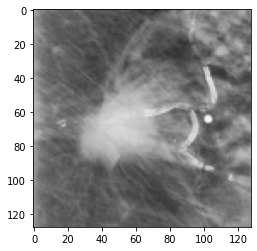

1/1 [==============================] - 0s 49ms/step
[1]
[[0.34226978 0.3514746  0.30625567]]
Cancer !
reqI cancer2.png


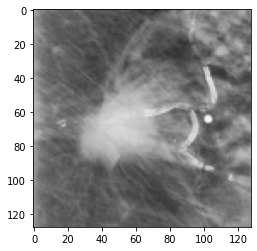

1/1 [==============================] - 0s 58ms/step
[1]
[[0.34226978 0.3514746  0.30625567]]
Cancer !
reqI normal1.png


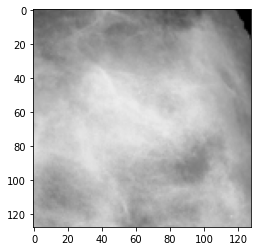

1/1 [==============================] - 0s 53ms/step
[1]
[[0.338187   0.3597207  0.30209228]]
Cancer !
reqI normal2.png


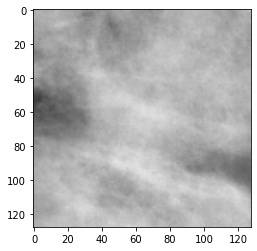

1/1 [==============================] - 0s 50ms/step
[1]
[[0.33402333 0.35645112 0.3095256 ]]
Cancer !
reqI benigne1.png


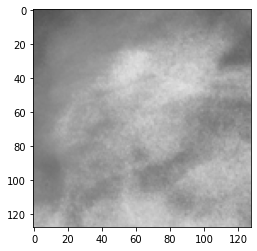

1/1 [==============================] - 0s 57ms/step
[1]
[[0.33681706 0.35361505 0.30956793]]
Cancer !
reqI benigne1.png


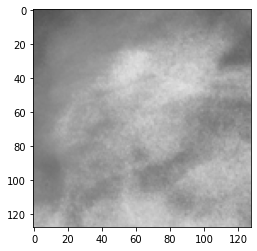

1/1 [==============================] - 0s 51ms/step
[1]
[[0.33681706 0.35361505 0.30956793]]
Cancer !
precision 0.625
reqI normal1.png


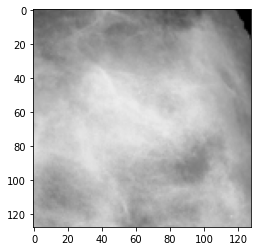

1/1 [==============================] - 0s 53ms/step
[1]
[[0.338187   0.3597207  0.30209228]]
Cancer !
reqI normal2.png


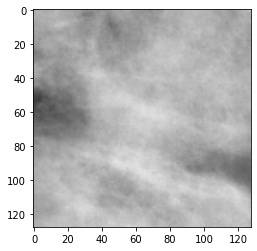

1/1 [==============================] - 0s 50ms/step
[1]
[[0.33402333 0.35645112 0.3095256 ]]
Cancer !
reqI normal3.png


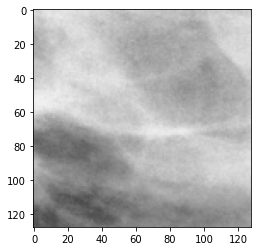

1/1 [==============================] - 0s 48ms/step
[1]
[[0.34370866 0.34598005 0.31031132]]
Cancer !
reqI normal4.png


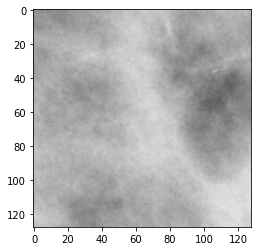

1/1 [==============================] - 0s 45ms/step
[1]
[[0.33565825 0.3520942  0.31224748]]
Cancer !
reqI benigne1.png


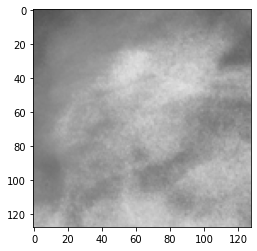

1/1 [==============================] - 0s 47ms/step
[1]
[[0.33681706 0.35361505 0.30956793]]
Cancer !
reqI benigne1.png


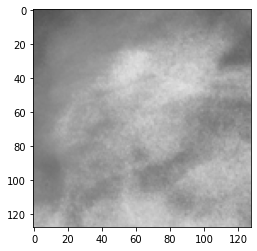

1/1 [==============================] - 0s 53ms/step
[1]
[[0.33681706 0.35361505 0.30956793]]
Cancer !
reqI benigne1.png


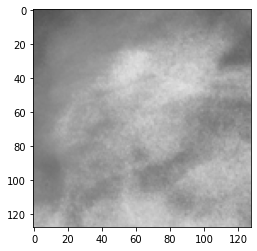

1/1 [==============================] - 0s 46ms/step
[1]
[[0.33681706 0.35361505 0.30956793]]
Cancer !
reqI cancer2.png


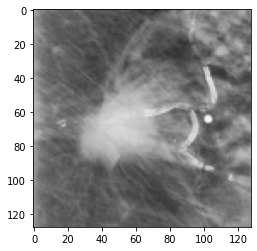

1/1 [==============================] - 0s 52ms/step
[1]
[[0.34226978 0.3514746  0.30625567]]
Cancer !


KeyboardInterrupt: ignored

In [ ]:
#code à utiliser dans anvil
from google.colab import files
import numpy as np
import cv2
from matplotlib import pyplot as plt

import anvil.server

anvil.server.connect("PHHLNDYA52NDP74ER2O4CC7M-ANZ64FOZCG7J3V7B")

y_true = ["benigne", "cancer", "benigne", "cancer", "normal", "benigne", "normal",  "normal"]
y_pred = ["benigne", "normal", "normal", "cancer", "normal", "cancer", "normal",  "normal"]


# retourné positive
tp = 5
# retourné negative
fp = 3
# non retourné positive (fn)
# non retourné non pertinent (tn)

precision = tp / (tp + fp)


@anvil.server.callable
def get_precision():
  print('precision', precision)
  return y_true, y_pred, tp, fp, precision

reqI = 'vide'

resultat = 'vide'

# fonction pour lire l'image requete
@anvil.server.callable
def  readImage(image):
  global reqI
  reqI = image
  print('reqI',reqI)


def predireClasse():
  global resultat
  image_to_predict = cv2.imread(reqI)
  plt.imshow(image_to_predict)
  plt.show()

  img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(128,128)), axis=0) 
   
  predict_x=model.predict(img_to_predict) 
  classes_x=np.argmax(predict_x,axis=1)
  
  print(np.argmax(predict_x,axis=1))
  print(predict_x) 

  if classes_x == 2:
    print('Normale !')
    resultat = 'Normale !' 
     
  elif classes_x == 1:
    print('Cancer !')
    resultat =  'Cancer !'  
    
  elif classes_x == 0 :
    print('Benigne !')
    resultat =  'Benigne ! ' 

@anvil.server.callable
def get_Result(): 
  predireClasse()
  return resultat

 #Calcul de accuracy
score = model.evaluate(val_data, verbose=1)
score_T = model.evaluate(train_data, verbose=1)
print(score[0])
print( score[1])

@anvil.server.callable
def returnAccuracy(): 
  return "%.3f" % score[0], "%.3f" % score[1] , "%.3f" % score_T[0], "%.3f" % score_T[1]



anvil.server.wait_forever()

# Nouvelle section